In [21]:
% matplotlib inline
import numpy
import math
import matplotlib.pyplot as plt

Create a Heaviside function

In [22]:
def Heaviside(x):
    H = numpy.zeros(len(x))
    for i in range(len(x)):
        if x[i] < 0.:
            H[i] = 0.
        else:
            H[i] = 1.
    return H

Check your Heaviside function.  Try different values here - remember, the desired output is `Heaviside(x) = 0` if  $x<0$, and `Heaviside(x) = 1` if $x>0$.

In [23]:
print (Heaviside([3., -2., 0.]))

[ 1.  0.  1.]


----
Set material parameters (feel free to experiment!)

In [24]:
E0 = 500. # MPa
E1 = 500. # MPa
tau = 10.# s

Set load parameters (feel free to experiment!)

In [25]:
# load s1 is applied at t1
t1 = 0.
s1 = 7.
# load s2 is applied at t2
t2 = 5.
s2 = 0.
# load s3 is applied at t3
s3 = -7.
t3 = 10.

# results will be shown up to final time T
T = 100.

Calculate appropriate step size and generate list of time points, then calculate stress values at each point

In [26]:
dt = T/1000.
t = numpy.arange(0., T, dt)

sig1 = s1*Heaviside(t-t1)
sig2 = s2*Heaviside(t-t2)
sig3 = s3*Heaviside(t-t3)

[-1.0, 100.0, -1.0, 10.0]

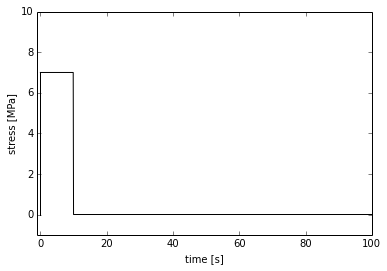

In [27]:
sig = sig1+sig2+sig3
plt.figure()
plt.plot([0.,0.],[0.,sig[0]],'k-')
plt.plot(t,sig,'k-')
plt.xlabel('time [s]')
plt.ylabel('stress [MPa]')
plt.axis([-1., T, -1., 10.])

Considering the loads separately, find their creep response.  Note that the Heaviside equation is contained in the definition of `sig1`, `sig2`, and `sig3`, so you can add them up directly. (Feel free to change these equations - say, to try out a Maxwell or Voigt or Burger's model instead of an SLS model.)

In [29]:
eps1 = numpy.zeros(len(t))
eps2 = numpy.zeros(len(t))
eps3 = numpy.zeros(len(t))

for i in range(len(t)):
    eps1[i] = sig1[i]/E1*(1. - (E0/(E0+E1))*math.exp(-(t[i]-t1)/tau))
    eps2[i] = sig2[i]/E1*(1. - (E0/(E0+E1))*math.exp(-(t[i]-t2)/tau))
    eps3[i] = sig3[i]/E1*(1. - (E0/(E0+E1))*math.exp(-(t[i]-t3)/tau))

[-1.0, 100.0, -0.015, 0.015]

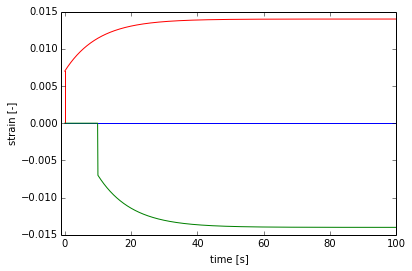

In [30]:
plt.figure()
plt.plot([0.,0.],[0.,eps1[0]],'r-')
plt.plot(t,eps1,'r-')
plt.plot(t,eps2,'b-')
plt.plot(t,eps3,'g-')
plt.xlabel('time [s]')
plt.ylabel('strain [-]')
plt.axis([-1., T, -0.015, 0.015])

Sum the strain responses together to get the total response.

[-1.0, 100.0, 0.0, 0.015]

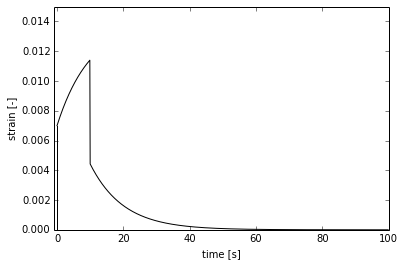

In [31]:
eps = eps1 + eps2 + eps3
plt.figure()
plt.plot([0.,0.],[0.,eps[0]],'k-')
plt.plot(t,eps,'k-')
plt.xlabel('time [s]')
plt.ylabel('strain [-]')
plt.axis([-1., T, 0., 0.015])

Now let's look at the stress-strain curve.

[-0.001, 0.015, -1.0, 9.0]

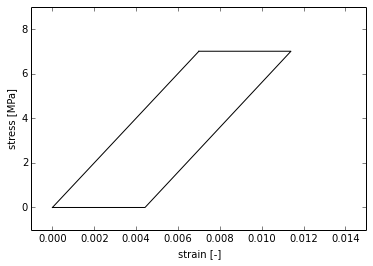

In [32]:
plt.figure()
plt.plot([0.,eps[0]],[0.,sig[0]],'k-')
plt.xlabel('strain [-]')
plt.ylabel('stress [MPa]')
plt.plot(eps,sig,'k-')
plt.axis([-0.001, 0.015, -1., 9.])